Text(0.5, 1.0, 'Original image')

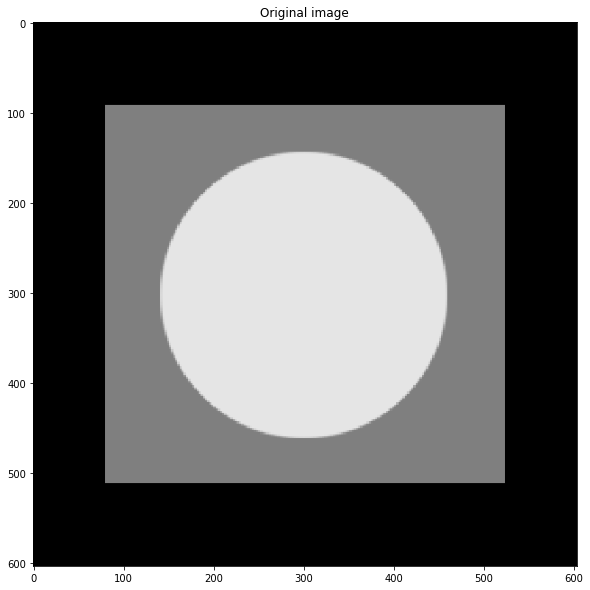

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://media.cheggcdn.com/media%2F2a9%2F2a90c92c-db23-4c83-ad8a-ae394c72a576%2Fphp2bN8Kd.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [41]:
def gamma_noise_distribution(img):
  gamma = np.random.normal(8, 35, (img.shape[0],img.shape[1])) 
  noisy_image = np.zeros(img.shape, np.float32)
  if len(img.shape) == 2:
    noisy_image = img + gamma
  else:
    noisy_image[:, :, 0] = img[:, :, 0] + gamma
    noisy_image[:, :, 1] = img[:, :, 1] + gamma
    noisy_image[:, :, 2] = img[:, :, 2] + gamma
  cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
  noisy_image = noisy_image.astype(np.uint8)
  alpha = -40
  beta = 30
  noisy_image = np.int16(noisy_image)
  noisy_image = noisy_image * (beta/127+1) - beta + alpha
  noisy_image = np.clip(noisy_image, 0, 255)
  noisy_image = np.uint8(noisy_image) 
  return noisy_image

Text(0.5, 1.0, 'Original image')

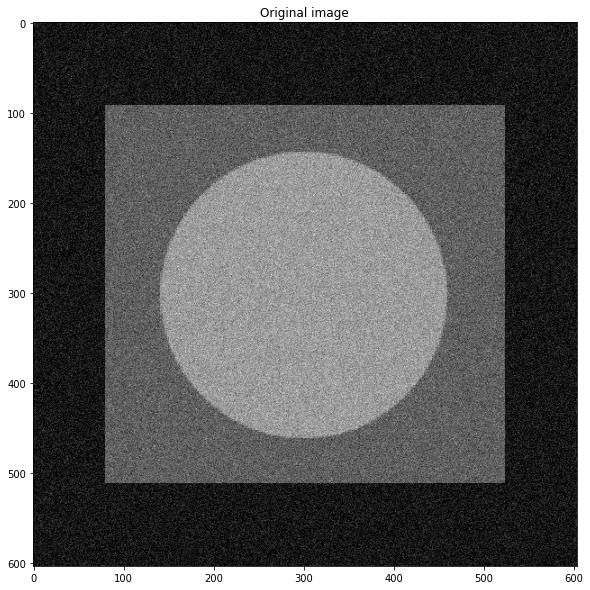

In [42]:
img = np.asarray(img)
noise_image = gamma_noise_distribution(img)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(noise_image, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")